In [ ]:
#importing the data and needed packages to manipulate the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true")
df

hours_per_week_bin occupation_bin  msr_bin capital_gl_bin race_sex_bin  \
0               b. 31-40   b. Mid - Low   b. Mid         c. > 0      c. High   
1                a. 0-30        e. High  c. High         a. = 0      c. High   
2               b. 31-40         a. Low   b. Mid         a. = 0      c. High   
3               b. 31-40         a. Low  c. High         a. = 0       b. Mid   
4               b. 31-40        e. High  c. High         a. = 0       a. Low   
...                  ...            ...      ...            ...          ...   
48837           b. 31-40        e. High   b. Mid         a. = 0       b. Mid   
48838           b. 31-40   b. Mid - Low   a. Low         a. = 0       b. Mid   
48839   d. 41-50 & 61-70        e. High  c. High         a. = 0      c. High   
48840           b. 31-40   b. Mid - Low   a. Low         c. > 0      c. High   
48841           e. 51-60        e. High  c. High         a. = 0      c. High   

      education_num_bin education_bin workclass_bin            age_bin   flag  \
0                 c. 13  c. Bachelors     b. income   d. 36-40 & 56-60  train   
1                 c. 13  c. Bachelors     b. income           e. 40-55  train   
2               b. 9-12        b. Mid     b. income   d. 36-40 & 56-60  train   
3                a. 0-8        a. Low     b. income           e. 40-55  train   
4                 c. 13  c. Bachelors     b. income  b. 26-30 & 71-100  train   
...                 ...           ...           ...                ...    ...   
48837             c. 13  c. Bachelors     b. income   d. 36-40 & 56-60   test   
48838           b. 9-12        b. Mid  a. no income   c. 31-35 & 61-70   test   
48839             c. 13  c. Bachelors     b. income   d. 36-40 & 56-60   test   
48840             c. 13  c. Bachelors     b. income           e. 40-55   test   
48841             c. 13  c. Bachelors     b. income   c. 31-35 & 61-70   test   

       y  
0      0  
1      0  
2      0  
3      0  
4      0  
...   ..  
48837  0  
48838  0  
48839  0  
48840  0  
48841  1  

[48842 rows x 11 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


**Data Quality Analysis**

Finding missing values



In [ ]:
df.isna().sum()

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

The dataset has no missing values 

Visualizing distribution of columns

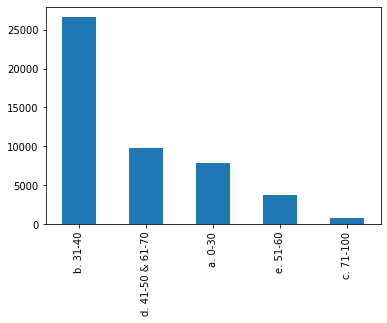

In [ ]:
df['hours_per_week_bin'].value_counts().plot(kind='bar')
plt.show()

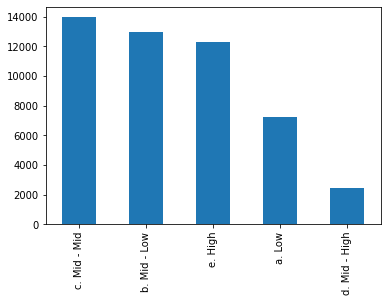

In [ ]:
df['occupation_bin'].value_counts().plot(kind='bar')
plt.show()

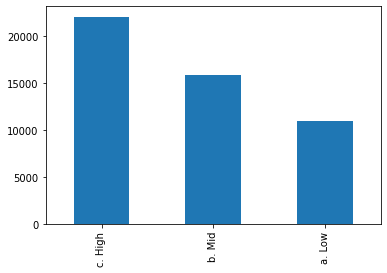

In [ ]:
df['msr_bin'].value_counts().plot(kind='bar')
plt.show()

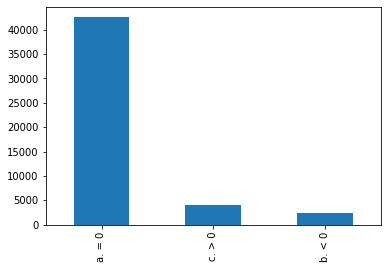

In [ ]:
df['capital_gl_bin'].value_counts().plot(kind='bar')
plt.show()

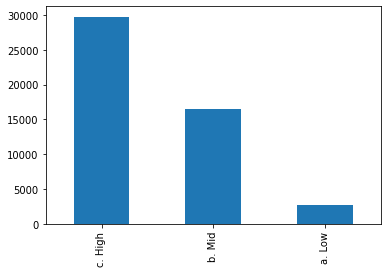

In [ ]:
df['race_sex_bin'].value_counts().plot(kind='bar')
plt.show()

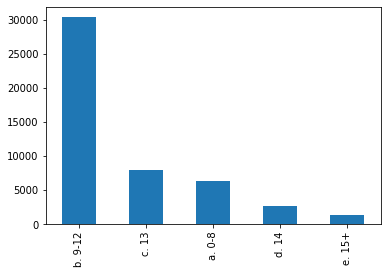

In [ ]:
df['education_num_bin'].value_counts().plot(kind='bar')
plt.show()

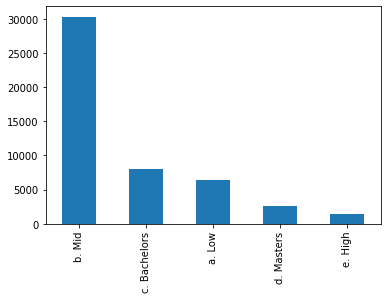

In [ ]:
df['education_bin'].value_counts().plot(kind='bar')
plt.show()

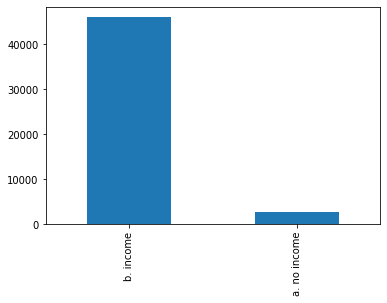

In [ ]:
df['workclass_bin'].value_counts().plot(kind='bar')
plt.show()

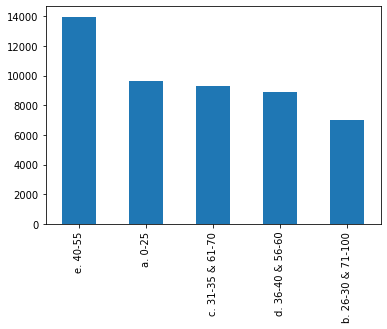

In [ ]:
df['age_bin'].value_counts().plot(kind='bar')
plt.show()

Descriptive Statistics for each column

In [ ]:
df.describe(include="object")

hours_per_week_bin occupation_bin  msr_bin capital_gl_bin race_sex_bin  \
count               48842          48842    48842          48842        48842   
unique                  5              5        3              3            3   
top              b. 31-40   c. Mid - Mid  c. High         a. = 0      c. High   
freq                26639          13971    22047          42525        29737   

       education_num_bin education_bin workclass_bin   age_bin   flag  
count              48842         48842         48842     48842  48842  
unique                 5             5             2         5      2  
top              b. 9-12        b. Mid     b. income  e. 40-55  train  
freq               30324         30324         46012     13963  32561

Data quality report

In [ ]:
report = df.describe(include="object").transpose()
report["Mode%"] = (report.freq/len(df))*100
report["%Miss"] =(df.isna().sum()/len(df))*100
report


count unique           top   freq      Mode%  %Miss
hours_per_week_bin  48842      5      b. 31-40  26639  54.541174    0.0
occupation_bin      48842      5  c. Mid - Mid  13971   28.60448    0.0
msr_bin             48842      3       c. High  22047  45.139429    0.0
capital_gl_bin      48842      3        a. = 0  42525  87.066459    0.0
race_sex_bin        48842      3       c. High  29737  60.884075    0.0
education_num_bin   48842      5       b. 9-12  30324   62.08591    0.0
education_bin       48842      5        b. Mid  30324   62.08591    0.0
workclass_bin       48842      2     b. income  46012  94.205806    0.0
age_bin             48842      5      e. 40-55  13963    28.5881    0.0
flag                48842      2         train  32561  66.665984    0.0



*   Cardinality is shown as the "unique" column
*   The mode is shown as the "top" column
* Mode frequency is shown as "freq" column



Build Decision Tree Classifier Models

In [ ]:
# splitting the dataset into training and testing sets based on the flag column
train_df = df[df["flag"]=="train"]
test_df = df[df["flag"]=="test"]

In [ ]:
train_df

hours_per_week_bin occupation_bin  msr_bin capital_gl_bin race_sex_bin  \
0               b. 31-40   b. Mid - Low   b. Mid         c. > 0      c. High   
1                a. 0-30        e. High  c. High         a. = 0      c. High   
2               b. 31-40         a. Low   b. Mid         a. = 0      c. High   
3               b. 31-40         a. Low  c. High         a. = 0       b. Mid   
4               b. 31-40        e. High  c. High         a. = 0       a. Low   
...                  ...            ...      ...            ...          ...   
32556           b. 31-40  d. Mid - High  c. High         a. = 0       b. Mid   
32557           b. 31-40   b. Mid - Low  c. High         a. = 0      c. High   
32558           b. 31-40   b. Mid - Low   b. Mid         a. = 0       b. Mid   
32559            a. 0-30   b. Mid - Low   a. Low         a. = 0      c. High   
32560           b. 31-40        e. High  c. High         c. > 0       b. Mid   

      education_num_bin education_bin workclass_bin            age_bin   flag  \
0                 c. 13  c. Bachelors     b. income   d. 36-40 & 56-60  train   
1                 c. 13  c. Bachelors     b. income           e. 40-55  train   
2               b. 9-12        b. Mid     b. income   d. 36-40 & 56-60  train   
3                a. 0-8        a. Low     b. income           e. 40-55  train   
4                 c. 13  c. Bachelors     b. income  b. 26-30 & 71-100  train   
...                 ...           ...           ...                ...    ...   
32556           b. 9-12        b. Mid     b. income  b. 26-30 & 71-100  train   
32557           b. 9-12        b. Mid     b. income   d. 36-40 & 56-60  train   
32558           b. 9-12        b. Mid     b. income   d. 36-40 & 56-60  train   
32559           b. 9-12        b. Mid     b. income            a. 0-25  train   
32560           b. 9-12        b. Mid     b. income           e. 40-55  train   

       y  
0      0  
1      0  
2      0  
3      0  
4      0  
...   ..  
32556  0  
32557  1  
32558  0  
32559  0  
32560  1  

[32561 rows x 11 columns]

In [ ]:
test_df

hours_per_week_bin occupation_bin  msr_bin capital_gl_bin race_sex_bin  \
32561           b. 31-40   b. Mid - Low   a. Low         a. = 0       b. Mid   
32562   d. 41-50 & 61-70   b. Mid - Low  c. High         a. = 0      c. High   
32563           b. 31-40  d. Mid - High  c. High         a. = 0      c. High   
32564           b. 31-40   b. Mid - Low  c. High         c. > 0       b. Mid   
32565            a. 0-30   b. Mid - Low   a. Low         a. = 0       b. Mid   
...                  ...            ...      ...            ...          ...   
48837           b. 31-40        e. High   b. Mid         a. = 0       b. Mid   
48838           b. 31-40   b. Mid - Low   a. Low         a. = 0       b. Mid   
48839   d. 41-50 & 61-70        e. High  c. High         a. = 0      c. High   
48840           b. 31-40   b. Mid - Low   a. Low         c. > 0      c. High   
48841           e. 51-60        e. High  c. High         a. = 0      c. High   

      education_num_bin education_bin workclass_bin            age_bin  flag  \
32561            a. 0-8        a. Low     b. income            a. 0-25  test   
32562           b. 9-12        b. Mid     b. income   d. 36-40 & 56-60  test   
32563           b. 9-12        b. Mid     b. income  b. 26-30 & 71-100  test   
32564           b. 9-12        b. Mid     b. income           e. 40-55  test   
32565           b. 9-12        b. Mid  a. no income            a. 0-25  test   
...                 ...           ...           ...                ...   ...   
48837             c. 13  c. Bachelors     b. income   d. 36-40 & 56-60  test   
48838           b. 9-12        b. Mid  a. no income   c. 31-35 & 61-70  test   
48839             c. 13  c. Bachelors     b. income   d. 36-40 & 56-60  test   
48840             c. 13  c. Bachelors     b. income           e. 40-55  test   
48841             c. 13  c. Bachelors     b. income   c. 31-35 & 61-70  test   

       y  
32561  0  
32562  0  
32563  1  
32564  1  
32565  0  
...   ..  
48837  0  
48838  0  
48839  0  
48840  0  
48841  1  

[16281 rows x 11 columns]

In [ ]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  32561 non-null  object
 1   occupation_bin      32561 non-null  object
 2   msr_bin             32561 non-null  object
 3   capital_gl_bin      32561 non-null  object
 4   race_sex_bin        32561 non-null  object
 5   education_num_bin   32561 non-null  object
 6   education_bin       32561 non-null  object
 7   workclass_bin       32561 non-null  object
 8   age_bin             32561 non-null  object
 9   flag                32561 non-null  object
 10  y                   32561 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 3.0+ MB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16281 entries, 32561 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  16281 non-null  object
 1   occupation_bin      16281 non-null  object
 2   msr_bin             16281 non-null  object
 3   capital_gl_bin      16281 non-null  object
 4   race_sex_bin        16281 non-null  object
 5   education_num_bin   16281 non-null  object
 6   education_bin       16281 non-null  object
 7   workclass_bin       16281 non-null  object
 8   age_bin             16281 non-null  object
 9   flag                16281 non-null  object
 10  y                   16281 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1.5+ MB


In [ ]:
train_df = train_df.drop("flag", axis=1)
test_df = test_df.drop("flag", axis=1)

In [ ]:
x_train = train_df.drop('y', axis=1)
y_train = train_df['y']
x_test = test_df.drop('y', axis=1)


In [ ]:
y_test = test_df["y"]

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  32561 non-null  object
 1   occupation_bin      32561 non-null  object
 2   msr_bin             32561 non-null  object
 3   capital_gl_bin      32561 non-null  object
 4   race_sex_bin        32561 non-null  object
 5   education_num_bin   32561 non-null  object
 6   education_bin       32561 non-null  object
 7   workclass_bin       32561 non-null  object
 8   age_bin             32561 non-null  object
dtypes: object(9)
memory usage: 2.5+ MB


In [ ]:
#Encoding using label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in x_train.columns:
    if x_train[col].dtype == 'object':
        x_train[col] = le.fit_transform(x_train[col])
        x_test[col] = le.transform(x_test[col])

In [ ]:
#using decision tree classifier algorithm
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=10, random_state=101, max_features = None, min_samples_leaf=15)
dtree.fit(x_train, y_train)
y_pred = dtree.predict(x_test)

Evaluating Decision Tree Performance

In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[11607   828]
 [ 1715  2131]]


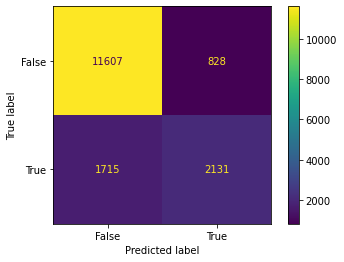

In [ ]:
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

From the confusion matrix above


*   11,607 is the number of true negatives
*   828 is the number of false positives
* 1,715 is the number of false negatives
* 2,131 is the number of true positives



In [ ]:
#Calculating the accuracy, precision, recall, and F1 score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1Score = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1Score)

Accuracy: 0.8438056630428107
Precision: 0.7201757350456235
Recall: 0.5540821632865315
F1 Score: 0.6263041880969876


* The accuracy of the model is 84.38%, which means that the 84.38% of the target variable values were correctly predicted by the model.
* The precision of the model is 72.02%, which means that out of all the total predicted positive observations, 72.02% were correct.
* The recall of the model is 55.41%, which means that for all values that were actually positive, 55.41% were classified correctly.
* The F1 score of the model is 0.6263, which is the harmonic mean of precision and recall that ranges between 0 and 1. The close the score is to 1 the better.

5. Tune Decision Tree Performance
- Q.3 **Decision Tree Hyper-parameter variation vs. performance**

Run 1

In [ ]:
#Varying run 1 columns (Entropy or Gini) and keeping other parameters to default
#Entropy
dtree_entro = DecisionTreeClassifier(criterion="entropy", random_state=101)
dtree_entro.fit(x_train, y_train)
y_pred_entro = dtree_entro.predict(x_test)

In [ ]:
#Evaluating performance
accuracy_entro = accuracy_score(y_test, y_pred_entro)
precision_entro = precision_score(y_test, y_pred_entro)
recall_entro = recall_score(y_test, y_pred_entro)
f1Score_entro = f1_score(y_test, y_pred_entro)

print("Accuracy:", accuracy_entro)
print("Precision:", precision_entro)
print("Recall:", recall_entro)
print("F1 Score:", f1Score_entro)

Accuracy: 0.8368650574289048
Precision: 0.6930564568462038
Recall: 0.5553822152886115
F1 Score: 0.6166281755196305


In [ ]:
#For Gini
dtree_gini = DecisionTreeClassifier(criterion="gini", random_state = 101)
dtree_gini.fit(x_train, y_train)
y_pred_gini = dtree_gini.predict(x_test)

In [ ]:
#Evaluating performance
accuracy_gini = accuracy_score(y_test, y_pred_gini)
precision_gini = precision_score(y_test, y_pred_gini)
recall_gini = recall_score(y_test, y_pred_gini)
f1Score_gini = f1_score(y_test, y_pred_gini)

print("accuracy:", accuracy_gini)
print("Precision:", precision_gini)
print("Recall:", recall_gini)
print("F1 Score:", f1Score_gini)

accuracy: 0.8367422148516676
Precision: 0.6929824561403509
Recall: 0.5546021840873635
F1 Score: 0.6161178509532063


In [ ]:
data = {"Performance metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
        "Entropy": [accuracy_entro, precision_entro, recall_entro, f1Score_entro],
        "Gini": [accuracy_gini, precision_gini, recall_gini, f1Score_gini]}
results = pd.DataFrame(data)
results.set_index("Performance metric", inplace=True)

print(results)
#Based on accuracy, entropy is the best split criteria

                     Entropy      Gini
Performance metric                    
Accuracy            0.836865  0.836742
Precision           0.693056  0.692982
Recall              0.555382  0.554602
F1 Score            0.616628  0.616118


Run 2: Minimum sample leaf (5, 10, 15, 20, 25, 30, 35, 40) and split criteria entropy

In [ ]:
#Accuracy scores
min_samples_leaf_values = [5, 10, 15, 20, 25, 30, 35, 40]
accuracy_scores = []

for min_samples_leaf in min_samples_leaf_values:
    dtree_entro = DecisionTreeClassifier(criterion="entropy", random_state=101, min_samples_leaf=min_samples_leaf)
    dtree_entro.fit(x_train, y_train)
    y_pred_entro = dtree_entro.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred_entro)
    accuracy_scores.append(accuracy)

print("Accuracy scores for different minimum sample leaf values:", accuracy_scores)

Accuracy scores for different minimum sample leaf values: [0.8397518579939807, 0.8396290154167434, 0.8424543946932007, 0.8416559179411585, 0.8421472882501075, 0.8430686075793871, 0.8430071862907684, 0.8438056630428107]


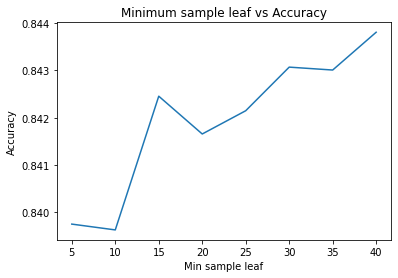

In [ ]:
#graphing minimum sample leaf vs accuracy
values = [5, 10, 15, 20, 25, 30, 35, 40]
acc = [0.8397518579939807, 0.8396290154167434, 0.8424543946932007, 0.8416559179411585, 0.8421472882501075, 0.8430686075793871, 0.8430071862907684, 0.8438056630428107]

plt.plot(values, acc)
plt.xlabel('Min sample leaf')
plt.ylabel('Accuracy')
plt.title('Minimum sample leaf vs Accuracy')
plt.show()

In [ ]:
#precision scores
min_samples_leaf_values = [5, 10, 15, 20, 25, 30, 35, 40]
precision_scores = []

for min_samples_leaf in min_samples_leaf_values:
    dtree_entro = DecisionTreeClassifier(criterion="entropy", random_state=101, min_samples_leaf=min_samples_leaf)
    dtree_entro.fit(x_train, y_train)
    y_pred_entro = dtree_entro.predict(x_test)
    precision_scores.append(precision_score(y_test, y_pred_entro))
    
print("Precision scores:", precision_scores)

Precision scores: [0.701400195376099, 0.7009437032216076, 0.7078870496592016, 0.7035966602440591, 0.705144694533762, 0.7125452749423773, 0.7145708582834331, 0.7168053244592346]


In [ ]:
#recall
min_samples_leaf_values = [5, 10, 15, 20, 25, 30, 35, 40]
recall_values = []

for min_samples_leaf in min_samples_leaf_values:
    dtree_entro = DecisionTreeClassifier(criterion="entropy", random_state=101, min_samples_leaf=min_samples_leaf)
    dtree_entro.fit(x_train, y_train)
    y_pred_entro = dtree_entro.predict(x_test)
    recall = recall_score(y_test, y_pred_entro)
    recall_values.append(recall)

print("recall values:", recall_values)

recall values: [0.5600624024960998, 0.5600624024960998, 0.5670826833073322, 0.5696827873114925, 0.5702028081123245, 0.5626625065002601, 0.5585023400936038, 0.5600624024960998]


In [ ]:
#f1 score
min_samples_leaf_values = [5, 10, 15, 20, 25, 30, 35, 40]
f1_scores = []

for min_samples_leaf in min_samples_leaf_values:
    dtree_entro = DecisionTreeClassifier(criterion="entropy", random_state=101, min_samples_leaf=min_samples_leaf)
    dtree_entro.fit(x_train, y_train)
    y_pred_entro = dtree_entro.predict(x_test)
    f1 = f1_score(y_test, y_pred_entro)
    f1_scores.append(f1)

print("f1_scores:", f1_scores)

f1_scores: [0.6228133583923667, 0.6226333285156814, 0.6297098310957124, 0.6295977011494254, 0.6305347901092583, 0.6287955833212263, 0.626970227670753, 0.6288133119252665]


In [ ]:
results = pd.DataFrame({
    'Minimum Sample Leaf': min_samples_leaf_values,
    'accuracy': accuracy_scores,
    'recall': recall_values,
    'precision': precision_scores,
    'f1_score': f1_scores
})

print(results)
#Based on accuracy, the best minimum sample leaf is 40.

   Minimum Sample Leaf  accuracy    recall  precision  f1_score
0                    5  0.844481  0.560062   0.711526  0.635788
1                   10  0.843806  0.560062   0.716805  0.628813
2                   15  0.839138  0.567083   0.696824  0.623869
3                   20  0.844481  0.569683   0.711526  0.635788
4                   25  0.844604  0.570203   0.709421  0.637951
5                   30  0.845034  0.562663   0.713456  0.636717
6                   35  0.844481  0.558502   0.712346  0.635159
7                   40  0.845648  0.560062   0.710718  0.641461


Run 3: Maximum feature: [auto, None, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8], split criteria entropy, and minimum sample leaf 40

In [ ]:
#accuracy score
dtree_entro = DecisionTreeClassifier(criterion="entropy", random_state=101, min_samples_leaf =40)
accuracy_scores = [] 
max_features = ['auto', None, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

for mf in max_features:
    dtree_entro = DecisionTreeClassifier(criterion="entropy", random_state=101, min_samples_leaf =40, max_features = mf)
    dtree_entro.fit(x_train, y_train)
    y_pred_entro = dtree_entro.predict(x_test)
    acc_score = accuracy_score(y_test, y_pred_entro)
    accuracy_scores.append(acc_score)
print("Accuracy score with max_features:", accuracy_scores)

Accuracy score with max_features: [0.8444812972176157, 0.8438056630428107, 0.8391376451077943, 0.8444812972176157, 0.8446041397948529, 0.8450340888151834, 0.8444812972176157, 0.8456483017013697]


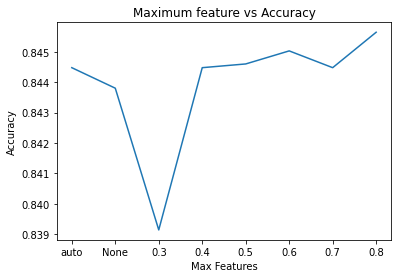

In [ ]:
#graphing maximum feature vs accuracy
values = ['auto', 'None', 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
acc = [0.8444812972176157, 0.8438056630428107, 0.8391376451077943, 0.8444812972176157, 0.8446041397948529, 0.8450340888151834, 0.8444812972176157, 0.8456483017013697]

plt.plot(values, acc)
plt.xlabel('Max Features')
plt.ylabel('Accuracy')
plt.title('Maximum feature vs Accuracy')
plt.show()

In [ ]:
#precision score
max_features = ['auto', None, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
precision_scores = []

for feature in max_features:
    dtree_entro = DecisionTreeClassifier(criterion="entropy", random_state=101, min_samples_leaf =40, max_features = feature)
    dtree_entro.fit(x_train, y_train)
    y_pred_entro = dtree_entro.predict(x_test)
    precision = precision_score(y_test, y_pred_entro)
    precision_scores.append(precision)

print("precision score with max_features:", precision_scores)

precision score with max_features: [0.7115260785576304, 0.7168053244592346, 0.6968238691049086, 0.7115260785576304, 0.7094207511139402, 0.7134559535333979, 0.7123464770523594, 0.7107176730951629]


In [ ]:
#recall
max_features_list = ['auto', None, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
recall_results = []

for max_features in max_features_list:
    dtree_entro = DecisionTreeClassifier(criterion="entropy", random_state=101, min_samples_leaf=40, max_features=max_features)
    dtree_entro.fit(x_train, y_train)
    y_pred_entro = dtree_entro.predict(x_test)
    recall = recall_score(y_test, y_pred_entro)
    recall_results.append(recall)

print("recall for max_features:", recall_results)

recall for max_features: [0.5746229849193968, 0.5600624024960998, 0.5647425897035881, 0.5746229849193968, 0.5795631825273011, 0.5748829953198128, 0.5730629225169007, 0.5845033801352054]


In [ ]:
#f1 score
f1_scores = []
max_features_values = ['auto', None, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

for max_features in max_features_values:
    dtree_entro = DecisionTreeClassifier(criterion="entropy", random_state=101, min_samples_leaf=40, max_features=max_features)
    dtree_entro.fit(x_train, y_train)
    y_pred_entro = dtree_entro.predict(x_test)
    f1 = f1_score(y_test, y_pred_entro)
    f1_scores.append(f1)
    
print("F1 Scores for max_features:", f1_scores)

F1 Scores for max_features: [0.6357882623705409, 0.6288133119252665, 0.6238690219732874, 0.6357882623705409, 0.6379507727532915, 0.6367170626349892, 0.6351585014409222, 0.6414609787416179]


In [ ]:
results = pd.DataFrame({
    'Maximum Feature': max_features,
    'accuracy': accuracy_scores,
    'recall': recall_results,
    'precision': precision_scores,
    'f1_score': f1_scores
})

print(results)
#Based on accuracy, the best maximum feature is 0.8

  Maximum Feature  accuracy    recall  precision  f1_score
0            auto  0.844481  0.574623   0.711526  0.635788
1            None  0.843806  0.560062   0.716805  0.628813
2             0.3  0.839138  0.564743   0.696824  0.623869
3             0.4  0.844481  0.574623   0.711526  0.635788
4             0.5  0.844604  0.579563   0.709421  0.637951
5             0.6  0.845034  0.574883   0.713456  0.636717
6             0.7  0.844481  0.573063   0.712346  0.635159
7             0.8  0.845648  0.584503   0.710718  0.641461


Run 4: Maximum depth: [2,4,6,8,10,12,14,16], split criteria entropy, minimum sample leaf 40, maximum feature 0.8

In [ ]:
#accuracy score
max_depths = [2, 4, 6, 8, 10, 12, 14, 16]
accuracy_scores = []

for max_depth in max_depths:
    dtree_entro = DecisionTreeClassifier(criterion="entropy", random_state=101, min_samples_leaf=40, max_features=0.8, max_depth=max_depth)
    dtree_entro.fit(x_train, y_train)
    y_pred_entro = dtree_entro.predict(x_test)
    acc = accuracy_score(y_test, y_pred_entro)
    accuracy_scores.append(acc)
print("Accuracy score with max_depth:", accuracy_scores)

Accuracy score with max_depth: [0.8217554204287206, 0.8345924697500153, 0.843744241754192, 0.8452797739696579, 0.8454026165468952, 0.843928505620048, 0.8449112462379461, 0.8456483017013697]


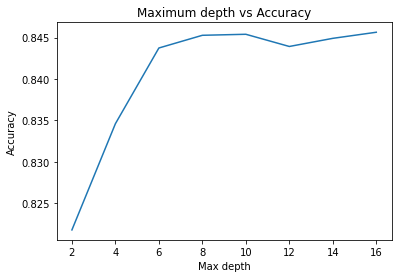

In [ ]:
#graphing maximum depth vs accuracy
values = [2, 4, 6, 8, 10, 12, 14, 16]
acc = [0.8217554204287206, 0.8345924697500153, 0.843744241754192, 0.8452797739696579, 0.8454026165468952, 0.843928505620048, 0.8449112462379461, 0.8456483017013697]

plt.plot(values, acc)
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.title('Maximum depth vs Accuracy')
plt.show()

In [ ]:
#precision score
max_depth_values = [2, 4, 6, 8, 10, 12, 14, 16]
precision_scores = []

for max_depth in max_depth_values:
    dtree_entro = DecisionTreeClassifier(criterion="entropy", random_state=101,min_samples_leaf=40, max_features=0.8, max_depth=max_depth)
    dtree_entro.fit(x_train, y_train)
    y_pred_entro = dtree_entro.predict(x_test)
    precision = precision_score(y_test, y_pred_entro)
    precision_scores.append(precision)

print("Precision scores for max_depth values:", precision_scores)

Precision scores for max_depth values: [0.7159194876486734, 0.7062611806797854, 0.7151354923992069, 0.7234759178174469, 0.7208374875373879, 0.7208121827411168, 0.7300592128178335, 0.7107176730951629]


In [ ]:
#recall
max_depth_values = [2, 4, 6, 8, 10, 12, 14, 16]
recall_results = []

for depth in max_depth_values:
    dtree_entro = DecisionTreeClassifier(criterion="entropy", random_state=101, min_samples_leaf =40, max_features = 0.8, max_depth=depth)
    dtree_entro.fit(x_train, y_train)
    y_pred_entro = dtree_entro.predict(x_test)
    recall = recall_score(y_test, y_pred_entro)
    recall_results.append(recall)

print("Recall results max_depth values:", recall_results)

Recall results max_depth values: [0.40691627665106606, 0.5132605304212169, 0.5626625065002601, 0.5585023400936038, 0.5639625585023401, 0.5538221528861155, 0.5449817992719709, 0.5845033801352054]


In [ ]:
# F1 Score
max_depth_values = [2, 4, 6, 8, 10, 12, 14, 16]
f1_scores = []

for max_depth in max_depth_values:
    dtree_entro = DecisionTreeClassifier(criterion="entropy", random_state=101, min_samples_leaf =40, max_features = 0.8, max_depth=max_depth)
    dtree_entro.fit(x_train, y_train)
    y_pred_entro = dtree_entro.predict(x_test)
    f1 = f1_score(y_test, y_pred_entro)
    f1_scores.append(f1)
print("F1 Scores for max_depth:", f1_scores)

F1 Scores for max_depth: [0.5188992042440318, 0.5944887818099683, 0.629802095459837, 0.6303741746148203, 0.6328227571115974, 0.6263784737538597, 0.6240881345838916, 0.6414609787416179]


In [ ]:
results = pd.DataFrame({
    'Maximum Depth': max_depth_values,
    'accuracy': accuracy_scores,
    'recall': recall_results,
    'precision': precision_scores,
    'f1_score': f1_scores
})

print(results)
#Based on accuracy, the best maximum depth is 16. 

   Maximum Depth  accuracy    recall  precision  f1_score
0              2  0.821755  0.406916   0.715919  0.635788
1              4  0.834592  0.513261   0.706261  0.628813
2              6  0.843744  0.562663   0.715135  0.623869
3              8  0.845280  0.558502   0.723476  0.635788
4             10  0.845403  0.563963   0.720837  0.637951
5             12  0.843929  0.553822   0.720812  0.636717
6             14  0.844911  0.544982   0.730059  0.635159
7             16  0.845648  0.584503   0.710718  0.641461


**The best decision tree based on accuracy with a random seed of 101 is one with split criteria entropy, minimum sample leaf 40, maximum feature 0.8, and maximum depth 16**

6. Evaluating the performance and Visualizing the best decision tree using GraphViz

In [ ]:
#confusion matrix
y_pred_entro = dtree_entro.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred_entro)
print(conf_matrix)

[[11520   915]
 [ 1598  2248]]


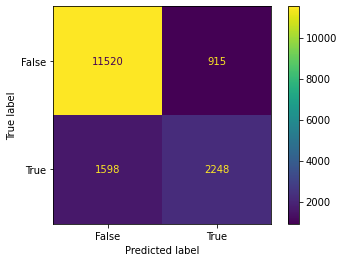

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

From the confusion matrix above,

* 11,520 is the number of true negatives
* 915 is the number of false positives
* 1,598 is the number of false negatives
* 2,248 is the number of true positives

In [ ]:
#Performance - the accuracy score, recall, precision score, and f1 score
dtree_entro = DecisionTreeClassifier(criterion='entropy', random_state=101, min_samples_leaf=40, max_features=0.8, max_depth=16)
dtree_entro.fit(x_train, y_train)
y_pred_entro = dtree_entro.predict(x_test)

accuracy = accuracy_score(y_test, y_pred_entro)
recall = recall_score(y_test, y_pred_entro)
precision = precision_score(y_test, y_pred_entro)
f1 = f1_score(y_test, y_pred_entro)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)


Accuracy: 0.8456483017013697
Recall: 0.5845033801352054
Precision: 0.7107176730951629
F1 Score: 0.6414609787416179


* The accuracy of the model is 84.56%, which means that the 84.56% of the target variable values were correctly predicted by the model.
* The recall of the model is 58.45%, which means that for all values that were actually positive, 58.45% were classified correctly.
* The precision of the model is 71.07%, which means that out of all the total predicted positive observations, 71.07% were correct.
* The F1 score of the model is 0.6415, which is the harmonic mean of precision and recall that ranges between 0 and 1. The close the score is to 1 the better.

In [ ]:
#visualizing the decision tree
#To be able to use graphviz without any errors, I used Colab not Juypter notebook.
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
from IPython.display import Image

dtree_entro = DecisionTreeClassifier(criterion='entropy', random_state=101, 
                                      min_samples_leaf=40, max_features=0.8, max_depth=16)
dtree_entro.fit(x_train, y_train)

dot_data = export_graphviz(dtree_entro, out_file=None, feature_names = x_train.columns, class_names=["0","1"], 
                           filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

7. Conclusion




*  Q.1 **Why does it makes sense to discretize columns for this problem?**
- The continuous data in this dataset was transformed to discrete categories - discretization of columns - because decision trees perform better with discrete categories. Specifically, discretization speeds up the process of training the model, which is especially helpful when a feature has a lot of values. 
* Moreover, binning the continuous data appropriately and with the right intervals minimizes the effect that outliers and skewness might have on the output because using bins ensures that data is spread more evenly/better in a much more appropriate range.
- Additionally, discretizing the columns makes it easier for the decision tree to understand the relationship between the target variable and the independent features because it transforms the numerous values of continuous data into a limited number of bins (categories). 
- Finally, the discretization makes it easier to understand and interpret the model.







*   Q.2 **What might be the issues (if any) if we DID NOT discretize the columns**.
* If the columns weren't discretized, the variance of continuous features can make the model sensitive to small changes in the data, which can affect the performance of the model when making predicitions because the model also learns the noise in the data instead of the actual underlying patterns. 
* If the columns weren't discretized, it might reduce the interpretability of the decision tree because the tree would have a lot more splits/branches based on the values of the continuous features making it harder to interpret.
* The lack of discretization can result in longer/slower training process because the algorithm has to take into account all the possible spolits for every continuous feature.
* Lack of discretization increases the risk of overfitting because the tree would have numerous branchess for the values of a continuous feature. As a result, the tree would fit the training data well but perform poorly on new/unseen data.




- Q.4 **How long was your total run time to train the best model?**

In [ ]:
#Using the time libray to determine the total time in seconds 
import time

start_time = time.time()

dtree_entro = DecisionTreeClassifier(criterion='entropy', random_state=101, 
                                      min_samples_leaf=40, max_features=0.8, max_depth=16)
dtree_entro.fit(x_train, y_train)

end_time = time.time()

total_time = end_time - start_time
print("Total time taken to train the model: {:.2f} seconds".format(total_time))

Total time taken to train the model: 0.04 seconds


- Q.5 **Did you find the best tree?**
* In this case, the "best tree" depended solely on the accuracy score of different hyper-parameters. However, evaluating a decision tree based on accuracy alone can be misleading because there are other factors that should be taken into consideration, especially in situations where the dataset might be imbalanced. Thus, I can't confirm that I found the best decision tree because to determine whether the best tree was found the other measures - precision, recall, and F1 score - had to be taken into account, which wasn't the case.

* Q.6 **Write your observations from the visualization of the best tree**
- Each node of the decision tree has entropy, samples, value, and class. The value of the entropy helps determine whether the node is pure (0) or impure (> 0). The samples indicate the number of samples from data that apply to that specific node. The value list indicates how many samples at the given node fall into each category. The class value shows the prediction that the node will make. 
- For instance, the root node (the top most node) is at a depth of zero, and this is where the decision tree asks the first question, which is whether the education_num_bin is less than or equal to 1.5. If the education_num_bin is less than or equal to 1.5, then you follow the true path. If it’s not, then you would follow the false path. The entropy of the root note is 0.796, which indicates that the node is impure and the samples in that node belong to different classes. The samples are 32561. Value=[24720,7841] indicates that 24720 samples fall into the category that follow the true path, while 7841 samples fall into the category that follow the false path. The class is 0 which shows the prediction of the node. However, this wouldn’t be the final decision because from the root node, you would follow the true or false path depending on the answer from the first question and keep answering questions until you reach the end leaf, which is the one that shows the final decision.
- Looking at the end nodes of the decision tree, not all leaves are pure because the entropy of each of the end nodes is not equal to 0. Some have an entropy that’s higher than 0. This means that the tree is not fully grown.


- Q.7 **Will this tree "overfit"?**
- No, it will not because by setting the maximum depth at 16, the growth of the decision tree couldn't go beyond the given depth. In this manner, the risk of overfitting was reduced. Moreover, the tree is not a fully grown tree because all end leaves aren't pure since the entropy of some of the end nodes is greater than 0.

8. Prediction using "Trained" Decision Tree Model

In [ ]:
#using unique() to see the different bin in the original dataset to know where to bin the individual with the given values

In [ ]:
df['hours_per_week_bin'].unique()

array(['b. 31-40', 'a. 0-30', 'd. 41-50 & 61-70', 'c. 71-100', 'e. 51-60'],
      dtype=object)

In [ ]:
bins = [0, 30, 41, 51, 61, 101]

# Define the bin labels
labels = ['0-30', '31-40', '41-50 & 61-70' , '51-60', '61-100']

# Use pandas.cut() to bin the number 48 into the intervals
result = pd.cut([48], bins=bins, labels=labels)
binned_value = result[0]


print(binned_value)

41-50 & 61-70


In [ ]:
df['occupation_bin'].unique()
# The occupation_Category of the individual falls under "Mid-Low" bin

array(['b. Mid - Low', 'e. High', 'a. Low', 'c. Mid - Mid',
       'd. Mid - High'], dtype=object)

In [ ]:
df['msr_bin'].unique()
# The marriage status & relationships of the individual falls under "High" bin

array(['b. Mid', 'c. High', 'a. Low'], dtype=object)

In [ ]:
df['capital_gl_bin'].unique()
# Capital gain of the individual falls under "> 0" bin

array(['c. > 0', 'a. = 0', 'b. < 0'], dtype=object)

In [ ]:
df['race_sex_bin'].unique()
# The race-sex group of the individual falls under "Mid" bin

array(['c. High', 'b. Mid', 'a. Low'], dtype=object)

In [ ]:
df['education_num_bin'].unique()
# The number of years of education of the individual falls under "9-12" bin

array(['c. 13', 'b. 9-12', 'a. 0-8', 'd. 14', 'e. 15+'], dtype=object)

In [ ]:
df['education_bin'].unique()
#The education category of the individidual falls under the "High" bin

array(['c. Bachelors', 'b. Mid', 'a. Low', 'd. Masters', 'e. High'],
      dtype=object)

In [ ]:
df['workclass_bin'].unique()
#The individual falls under the "income" bin

array(['b. income', 'a. no income'], dtype=object)

In [ ]:
df['age_bin'].unique()
#The individual falls under the "36-40 & 56-60" bin

array(['d. 36-40 & 56-60', 'e. 40-55', 'b. 26-30 & 71-100',
       'c. 31-35 & 61-70', 'a. 0-25'], dtype=object)

In [ ]:
df.columns

Index(['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin',
       'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin',
       'age_bin', 'flag', 'y'],
      dtype='object')

In [ ]:
#creating dataframe for the individual
data = {
    'hours_per_week_bin': ['41-50 & 61-70'],
    'occupation_bin': ['Mid - Low'],
    'msr_bin': ['High'],
    'capital_gl_bin': ['> 0'],
    'race_sex_bin': ['Mid'],
    'education_num_bin': ['9-12'],
    'education_bin': ['High'],
    'workclass_bin': ['income'],
    'age_bin': ['36-40 & 56-60']
}

data_pred = pd.DataFrame(data)

In [ ]:
data_pred.columns

Index(['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin',
       'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin',
       'age_bin'],
      dtype='object')

In [ ]:
#encoding with label encoder 
le = LabelEncoder()
for col in data_pred.columns:
    if data_pred[col].dtype == 'object':
        data_pred[col] = le.fit_transform(data_pred[col])
        

In [ ]:
predictions = dtree_entro.predict(data_pred)

# Print the predictions
print(predictions)

[0]


- Q.8 What is the probability that the prediction for the individual is correct?

In [ ]:
proba = dtree_entro.predict_proba(data_pred)


In [ ]:
proba

array([[1., 0.]])

In [ ]:
prob_estimates = [proba[i, p] for i, p in enumerate(predictions)]


In [ ]:
prob_correct = sum(prob_estimates) / len(prob_estimates)

In [ ]:
prob_correct

1.0